## <a id = "link1"></a> Import Libraries and Load Dataset

In [286]:
import warnings
warnings.filterwarnings('ignore')

In [287]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [288]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [289]:
df.shape

(5000, 14)

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [291]:
df.dropna()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [292]:
#Analyzing the distribution of the various attribute
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Insights:** `Categorical columns have already 0's and 1's except education , and categorical columns are Education, Personal Loan, 
Securities Account, CD Account, Online, Creditcard.`


In [293]:
df.nunique() # Number of unique values in a column

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

**Insights:**
- `Education, Personal Loan, Securities Account, CD Account,online,creditcard are all categorical columns.`

In [294]:
dfMortgage = df[(df['Mortgage']==0)].count()
dfMortgage['Mortgage']


3462

In [295]:
dfccavg = df[(df['CCAvg']==0)].count()
dfccavg['CCAvg']

106

In [296]:
df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [297]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [73]:
df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [164]:
df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [165]:
df['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [166]:
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

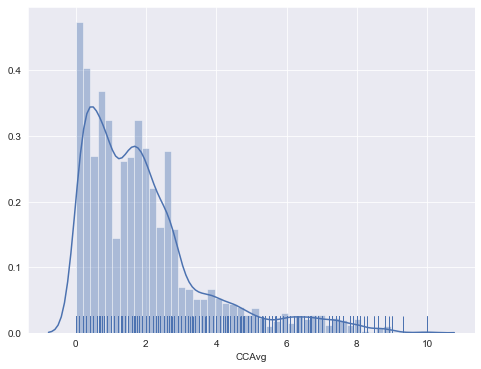

In [167]:
sns.set({'figure.figsize': (8,6)})
sns.distplot(df['CCAvg'], kde=True,rug=True);

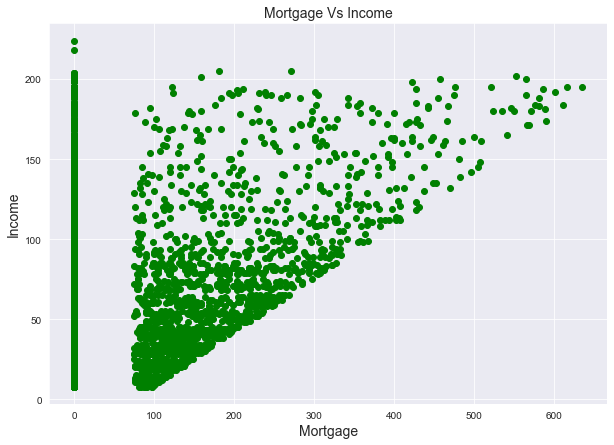

In [94]:
plt.figure(figsize=(10,7))
plt.scatter(df['Mortgage'], df['Income'], color='green')
plt.title('Mortgage Vs Income', fontsize=14)
plt.xlabel('Mortgage', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.grid(True)
plt.show()

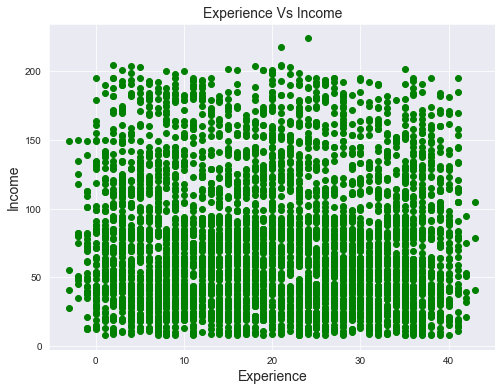

In [95]:
plt.scatter(df['Experience'], df['Income'], color='green')
plt.title('Experience Vs Income', fontsize=14)
plt.xlabel('Experience', fontsize=14)
plt.ylabel('Income', fontsize=14)
plt.grid(True)
plt.show()

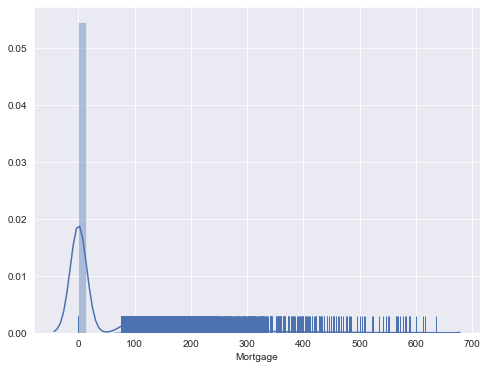

In [83]:
sns.set({'figure.figsize': (8,6)})
sns.distplot(df['Mortgage'], kde=True,rug=True);

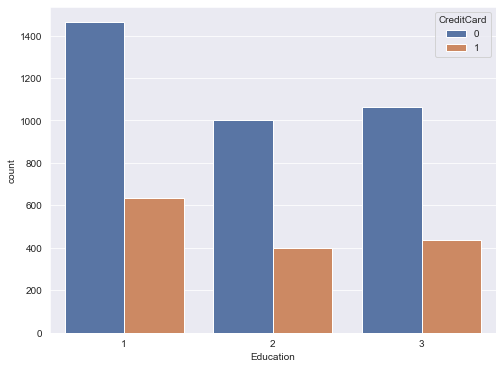

In [101]:
sns.countplot(x='Education', data=df, hue=df['CreditCard']);

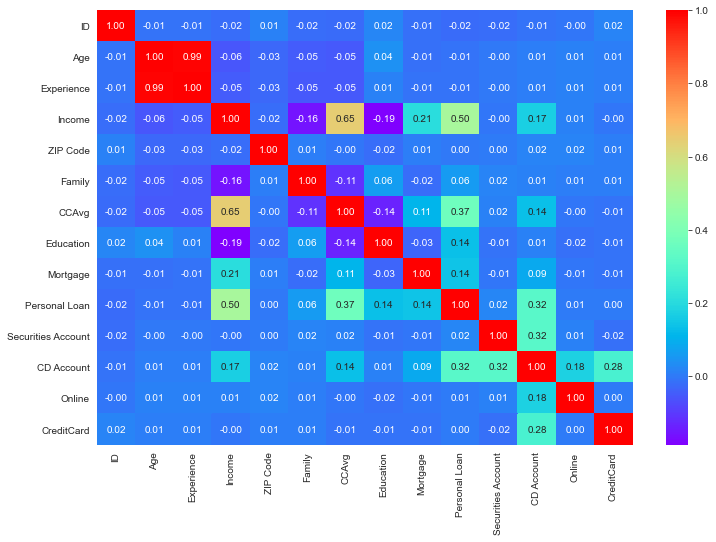

In [107]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

In [298]:
bankdf = df.drop('ID', axis =1 )
bankdf=bankdf.drop('ZIP Code',axis=1)
#Convert X & Y variable to a categorical variable wherever relevant
bankdf['Securities Account'] = bankdf['Securities Account'].astype('category')
bankdf['CD Account'] = bankdf['CD Account'].astype('category')
bankdf['Online'] = bankdf['Online'].astype('category')
bankdf['CreditCard'] = bankdf['CreditCard'].astype('category')
bankdf['Personal Loan'] = bankdf['Personal Loan'].astype('category')
bankdf['Education'] = bankdf['Education'].astype('category')
bankdf.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [299]:
bankdf.dtypes

Age                      int64
Experience               int64
Income                   int64
Family                   int64
CCAvg                  float64
Education             category
Mortgage                 int64
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
dtype: object

In [300]:
#Data preparation
X = bankdf.drop('Personal Loan', axis=1)
y = bankdf[['Personal Loan']]

print(X.head())
print(y.head())

   Age  Experience  Income  Family  CCAvg Education  Mortgage  \
0   25           1      49       4    1.6         1         0   
1   45          19      34       3    1.5         1         0   
2   39          15      11       1    1.0         1         0   
3   35           9     100       1    2.7         2         0   
4   35           8      45       4    1.0         2         0   

  Securities Account CD Account Online CreditCard  
0                  1          0      0          0  
1                  1          0      0          0  
2                  0          0      0          0  
3                  0          0      0          0  
4                  0          0      0          1  
  Personal Loan
0             0
1             0
2             0
3             0
4             0


In [301]:
#X = pd.get_dummies(X, columns=['Family', 'Education'])
X = pd.get_dummies(X, drop_first=True)
X.dtypes
X.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,25,1,49,4,1.6,0,0,0,1,0,0,0
1,45,19,34,3,1.5,0,0,0,1,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,0,1,0,0,0,0,0
4,35,8,45,4,1.0,0,1,0,0,0,0,1


In [302]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [308]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=4294967295,fit_intercept=True)
logreg.fit(X_train, y_train)                    # fit the model on train data

LogisticRegression(random_state=4294967295)

In [309]:
y_predict = logreg.predict(X_test)     

In [310]:
# Observe the predicted and observed classes in a dataframe.

z = X_test.copy()
#y_test
z['ObservedValue'] = y_test
z['PredictedValue'] = y_predict
z.head(500)

,Age,Experience,Income,Family,CCAvg,Mortgage,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1,ObservedValue,PredictedValue
3406,42,12,34,3,2.0,0,0,1,0,0,0,1,0,0
757,52,28,81,3,1.8,0,1,0,1,0,0,0,0,0
3624,58,28,70,1,1.4,0,0,1,0,0,0,0,0,0
4544,28,4,80,3,2.5,0,0,0,0,0,1,0,0,0
3235,60,35,39,2,1.6,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,33,9,50,1,2.4,0,1,0,0,0,0,0,0,0
2054,39,15,89,2,1.9,0,0,0,0,0,0,0,0,0
2163,33,3,69,4,1.8,0,0,1,0,0,1,0,0,0
131,58,34,149,4,7.2,0,1,0,0,1,1,1,1,1


In [311]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9528571428571428

Testing accuracy 0.9566666666666667

Confusion Matrix


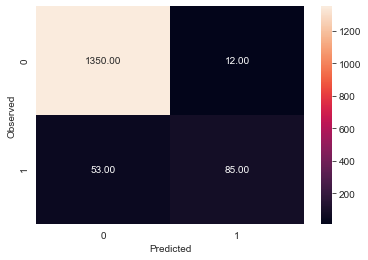

None

Recall: 0.6159420289855072

Precision: 0.8762886597938144

F1 Score: 0.7234042553191489

Roc Auc Score: 0.9671093234586817


In [312]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,logreg.predict_proba(X_test)[:,1] ))

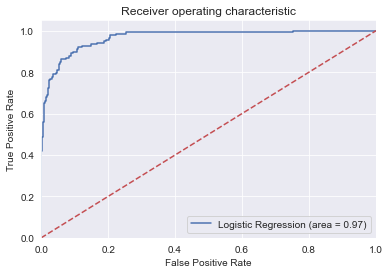

In [313]:
# !pip install yellowbrick

# Additional

#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [314]:
#coeff cols
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(logreg.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
7,Education_3,3.27
6,Education_2,2.60
9,CD Account_1,2.29
3,Family,0.56
1,Experience,0.45
0,Age,0.44
11,CreditCard_1,0.40
10,Online_1,0.39
8,Securities Account_1,0.36
4,CCAvg,0.13


In [274]:
#Test data where observed value not equal to predicted value
z.query('ObservedValue!=PredictedValue')

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account_1,CD Account_1,Online_1,CreditCard_1,ObservedValue,PredictedValue
4575,53,27,115,2,0.5,3,0,0,0,0,0,1,0
2261,30,3,150,4,5.0,2,0,0,0,1,0,1,0
1125,37,13,172,2,6.5,1,0,0,0,0,0,0,1
3383,46,22,135,3,4.1,1,213,0,0,1,0,1,0
459,35,10,200,2,3.0,1,458,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,52,26,91,1,4.3,2,0,0,1,1,1,1,0
927,65,40,95,3,3.7,2,138,0,0,0,1,1,0
3084,26,0,129,3,0.7,2,0,0,0,0,0,1,0
4163,54,28,108,4,1.9,2,0,0,0,1,0,1,0


In [ ]:
#Business insigths
##### `Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Predicted that personal loan will be granted and the customer was eligibile for loan
Here from the confusion matrix, I see the value is 82. There are very few whom bank can give loan here.

*False Positive (observed=0,predicted=1):*

Predicted that personal loan will be granted but the customer was not eligibile for loan
From confusion matrix count is 19, which is also very low. This will save money for the bank and good analysis. 

*True Negative (observed=0,predicted=0):*

Predicted that personal loan will not be granted and the customer was not eligibile for loan
This is the high value from the confusion matrix. This indicates that more number of liability customers cannot be given personal
loan. But bank is trying to convert liability customers to personal loan customers for profit. In this case, bank 
cannot give personal loan to many of its liability customers.

*False Negative (observed=1,predicted=0):*

Predicted that personal loan will not be granted but the customer was eligibile for loan
Confusion matrix we have a value of 53 which is also less. Bank must have the expectations that these are real
elibile customer who they can convert them to personal loan customers. But it turns out to be wrong from the model. Oneway bank 
must have save some money from these people. 

From Coefficients, 
Customers who are Graduates and Advanced/Professionals,Creditcard , Online seems to be features which can effect the model's output.

"Mortgage", "Income" are almost equivalent to 0 and does not help in predicting target variable.
